In [1]:
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('../data/picrust2/02-EC_predicted.tsv.gz', compression='gzip', header=0, sep='\t', quotechar='"', error_bad_lines=False, index_col=0)
df.T

sequence,0003670ded0674981fb6ace93921cf9d,0003c2463b98a6c28926dec4040423f0,0004e798b8a4a52c71075db3de6b86a4,0009e05d156dac5a1094ab2b0e532970,0016aceac264cb884cf1188da48f7207,001739195218db90d8c99177320e6441,002135c6618a6f14de790a83e7c0af23,0024d21b0b3528590a655edb61c8c7eb,0025fa28cb890a0f8164760e3a11d614,003ad86ffd1562ae5ee54df60ceb830a,...,ffa4a2e0abcbc437d1640e2ceb277cd0,ffa5f8d63d4c94e91fbcf10a172938ab,ffb10a9af5d072d4be8fe78ddefce767,ffb921b69b5b294ffffc2be6001a2e65,ffc1b5509a9d48ddfc2d4e8603bede66,ffc40a7b5a34f75614720e13eb7e735c,ffc4c1468e8808c290dbb9d0e0f6792f,ffd9aad6b4181dbf96e3e4cbce0d95a7,ffef5b489ec0e9768fc90d508f8c85b2,fff948da4b2b617824d23e8be21b5e3d
EC:1.1.1.1,2,2,1,3,3,1,1,1,1,1,...,1,1,2,3,1,0,4,1,1,1
EC:1.1.1.10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC:1.1.1.100,4,7,8,8,10,6,2,4,4,4,...,4,4,5,10,3,5,10,3,2,2
EC:1.1.1.101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC:1.1.1.102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EC:6.5.1.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC:6.5.1.6,0,0,1,1,1,1,0,0,0,0,...,0,0,2,1,0,1,1,0,0,1
EC:6.5.1.7,0,0,1,1,1,1,0,0,0,0,...,0,0,2,1,0,1,1,0,0,1
EC:6.6.1.1,0,0,1,1,1,0,0,1,1,1,...,1,1,0,0,0,1,1,0,0,0


In [3]:
df.values

array([[2, 0, 4, ..., 0, 0, 0],
       [2, 0, 7, ..., 0, 0, 0],
       [1, 0, 8, ..., 1, 1, 0],
       ...,
       [1, 0, 3, ..., 0, 0, 0],
       [1, 0, 2, ..., 0, 0, 0],
       [1, 0, 2, ..., 1, 0, 0]])

In [4]:
pca = PCA(n_components=3)
transformed = pca.fit(df.values).transform(df.values)
transformed

array([[ -8.36297552,   1.59050446,   2.61306863],
       [ -5.89103371,   5.57063254,   0.04638942],
       [  4.53587873,  17.20078447,  -8.11822532],
       ...,
       [-10.99640153,  -7.01968432,   0.83387781],
       [ -7.81086251,   0.92769262,   3.7914799 ],
       [ -2.48242879,  -1.94609988,   7.62398946]])

In [5]:
df_tax = pd.read_csv('../data/qiime2/filtered/exported-feature-table/taxonomy.tsv', sep='\t', index_col=0)
df_tax = df_tax[df_tax.index.isin(df.index)]

In [6]:
tax = [i.split(';') for i in df_tax['Taxon']]

In [7]:
phylum = []
for i in tax:
    fill = 'others'
    for y in i:
        #print(y)
        if y.startswith(' p'):
            fill = y
    phylum.append(fill)

In [8]:
kingdom = []
for i in tax:
    fill = 'others'
    for y in i:
        #print(y)
        if y.startswith(' c'):
            fill = y
    kingdom.append(fill)

In [9]:
x = transformed[:, 0]
y = transformed[:, 1]
z = transformed[:, 2]
data = pd.DataFrame(data={1:x, 2:y, 3:z, 4:phylum})

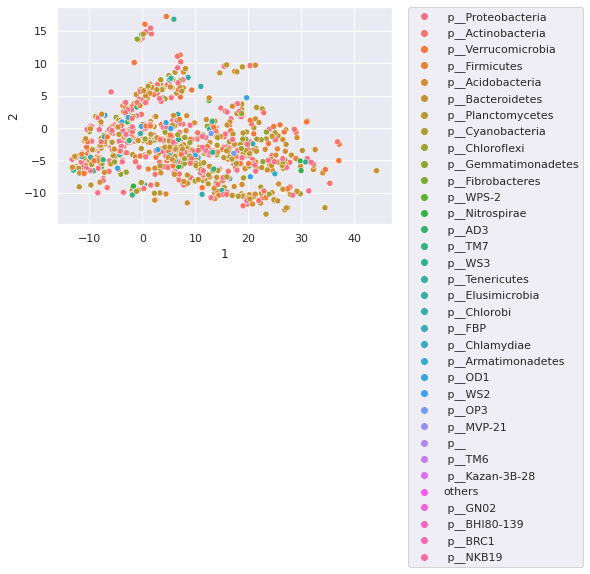

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="darkgrid")
sns.scatterplot(data=data, x=1, y=2, hue=4, legend=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('../figures/PCA.png')

In [11]:
len(phylum)

8820

In [12]:
len(x)

8820

In [13]:
df_tax.index

Index(['e5400356daabbc5a41f935af70513043', '7cbebea20e305a557ffc3dc23bae61ae',
       '4dc5023fdc00f325e169fced16dca21c', '4c076cffb4dc7aaae47cb237d7067066',
       '3c4c98cf9b1264b89f9ecd0812a0f7d8', 'ba22b4e380c113550221ee14a5dc5119',
       '2467e65a973ac677dcebdf6e430c451f', '417f5119220266841988ce051341d15a',
       '74c0aa7746daffa6653f36543da55be5', 'd9b53237401a5cea97b79cebeb8a3368',
       ...
       '58d1ec0aabee551fa1b816d839d2d55f', '3d89298f40d267f7adf0c03be3399e24',
       '5dde5b1b05063e71450581e2c0274fde', '5b9ac343093ef3b9bcab4475cbad755f',
       '953ec72370cd23f1cec64150ee24f765', '1b5c982a1bb0eb9715fa9be2ed108bf6',
       '19f24683ed9a487906f6a50bd09181a4', '7e2632e260efa3086386801f5b1484ef',
       'af6122ff00ffab21a39e62cbb656e011', '58b21c767eb21c6049f31ce76a95b641'],
      dtype='object', name='Feature ID', length=8820)

In [14]:
df_tax = df_tax[df_tax.index.isin(df.index)]